In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [36]:
def generate_data():

    np.random.seed(123) #Set seed for reproducibility. Please do not change/remove this line.
    x = np.random.uniform(-1,1,(128,2)) #You may change the number of samples you wish to generate
    y=[]
    for i in range(x.shape[0]):
        y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5)) #Forming labels
    return x,y

In [37]:
def flip_labels(y):
    num = int(0.05 * len(y)) #5% of data to be flipped
    np.random.seed(123)
    changeind = np.random.choice(len(y),num,replace=False) 
    yc=np.copy(y) # yc=y is a bad practice since it points to the same location and changing y or yc would change the other which won't be desired always
    #Flip labels -1 --> 1 and 1 --> -1
    for i in changeind:
        if yc[i]==-1.0:
            yc[i]=1.0
        else:
            yc[i]=-1.0

    return yc

In [38]:
def train_test_dt(x,y):
    train = []
    test = []
    k = [i for i in range(2,11)]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
    for i in range(2,11):
        clf = tree.DecisionTreeClassifier() 
        scores1 = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=i)
        scores2 = cross_val_score(estimator=clf, X=x_test, y=y_test, cv=i)
        train.append((i,scores1.mean()))
        test.append((i,scores2.mean()))
    print(train)
    print(test)
     
    plt.plot(k,train,'b-',label='Train Accuracy')
    plt.plot(k,test,'r-',label='Test Accuracy')
    plt.legend()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)    
    plt.xlabel('Different values of k',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.title('Decision Tree',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.show()
       
   
    

In [39]:
def train_test_nb(x,y):
    train = []
    test = []
    k = [i for i in range(2,11)]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
    for i in range(2,11):
        clf =  GaussianNB() 
        scores1 = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=i)
        scores2 = cross_val_score(estimator=clf, X=x_test, y=y_test, cv=i)
        train.append((i,scores1.mean()))
        test.append((i,scores2.mean()))
    print(train)
    print(test)
     
    plt.plot(k,train,'b-',label='Train Accuracy')
    plt.plot(k,test,'r-',label='Test Accuracy')
    plt.legend()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Different values of k',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.title('Naive Bayes',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.show()

In [40]:
def main():

    x,y = generate_data() #Generate data
    y = flip_labels(y) #Flip labels
    y=np.asarray(y) #Change list to array
    train_test_dt(x,y)
    train_test_nb(x,y)
    




[(2, 0.6578947368421053), (3, 0.8301282051282052), (4, 0.7777777777777778), (5, 0.8017857142857142), (6, 0.8472222222222223), (7, 0.7928571428571429), (8, 0.81875), (9, 0.8444444444444444), (10, 0.8083333333333332)]
[(2, 0.7474074074074074), (3, 0.8257080610021786), (4, 0.823489010989011), (5, 0.8428282828282828), (6, 0.8379629629629629), (7, 0.863095238095238), (8, 0.8779761904761905), (9, 0.8444444444444444), (10, 0.8616666666666667)]


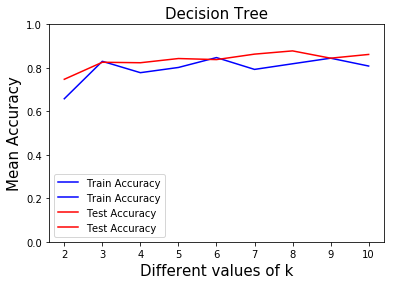

[(2, 0.7105263157894737), (3, 0.8066239316239318), (4, 0.8736111111111111), (5, 0.8589285714285715), (6, 0.8492063492063493), (7, 0.8357142857142856), (8, 0.859375), (9, 0.8500000000000001), (10, 0.8208333333333332)]
[(2, 0.7503703703703704), (3, 0.7886710239651417), (4, 0.7701465201465202), (5, 0.7682828282828282), (6, 0.7486111111111112), (7, 0.7916666666666666), (8, 0.7849702380952381), (9, 0.8026455026455026), (10, 0.7649999999999999)]


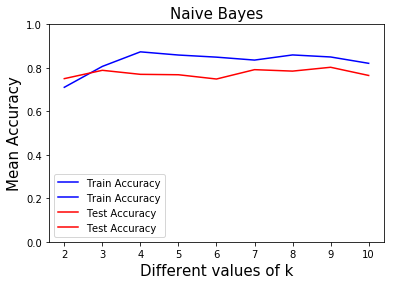

In [41]:
if __name__=='__main__':
    main()